### import necessary librarires

In [1]:
import pandas as pd,seaborn as sns,matplotlib.pyplot as plt,numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

as we can see there is some missing value present in some column lets check the percentage of those missing values 

In [5]:
(df.isnull().sum()/len(df))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

we can fill  those misisng values with mean and mode as appropriate

1) Gender<br>
2) Married<br>
3) Dependents<br>
4) self_employed<br>
5) loadamount<br>
6) load_amount_term<br>
7) credit_history

these are the column which having missing values so better to fill 

In [6]:
# data integrity check

df.duplicated().sum()

0

In [7]:
df.isin(['NA'," ","-","NaN","?"]).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


as we can see that there is object ,int and float type of data present

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#cate=['Gender', 'Married', 'Dependents', 'Education',
#       'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History']
cate=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [12]:
for i in cate:
    print(i)
    print(df[i].value_counts())
    print("*"*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
****************************************************************************************************
Married
Yes    398
No     213
Name: Married, dtype: int64
****************************************************************************************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************************************************************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************************************************************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************************************************************************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0     

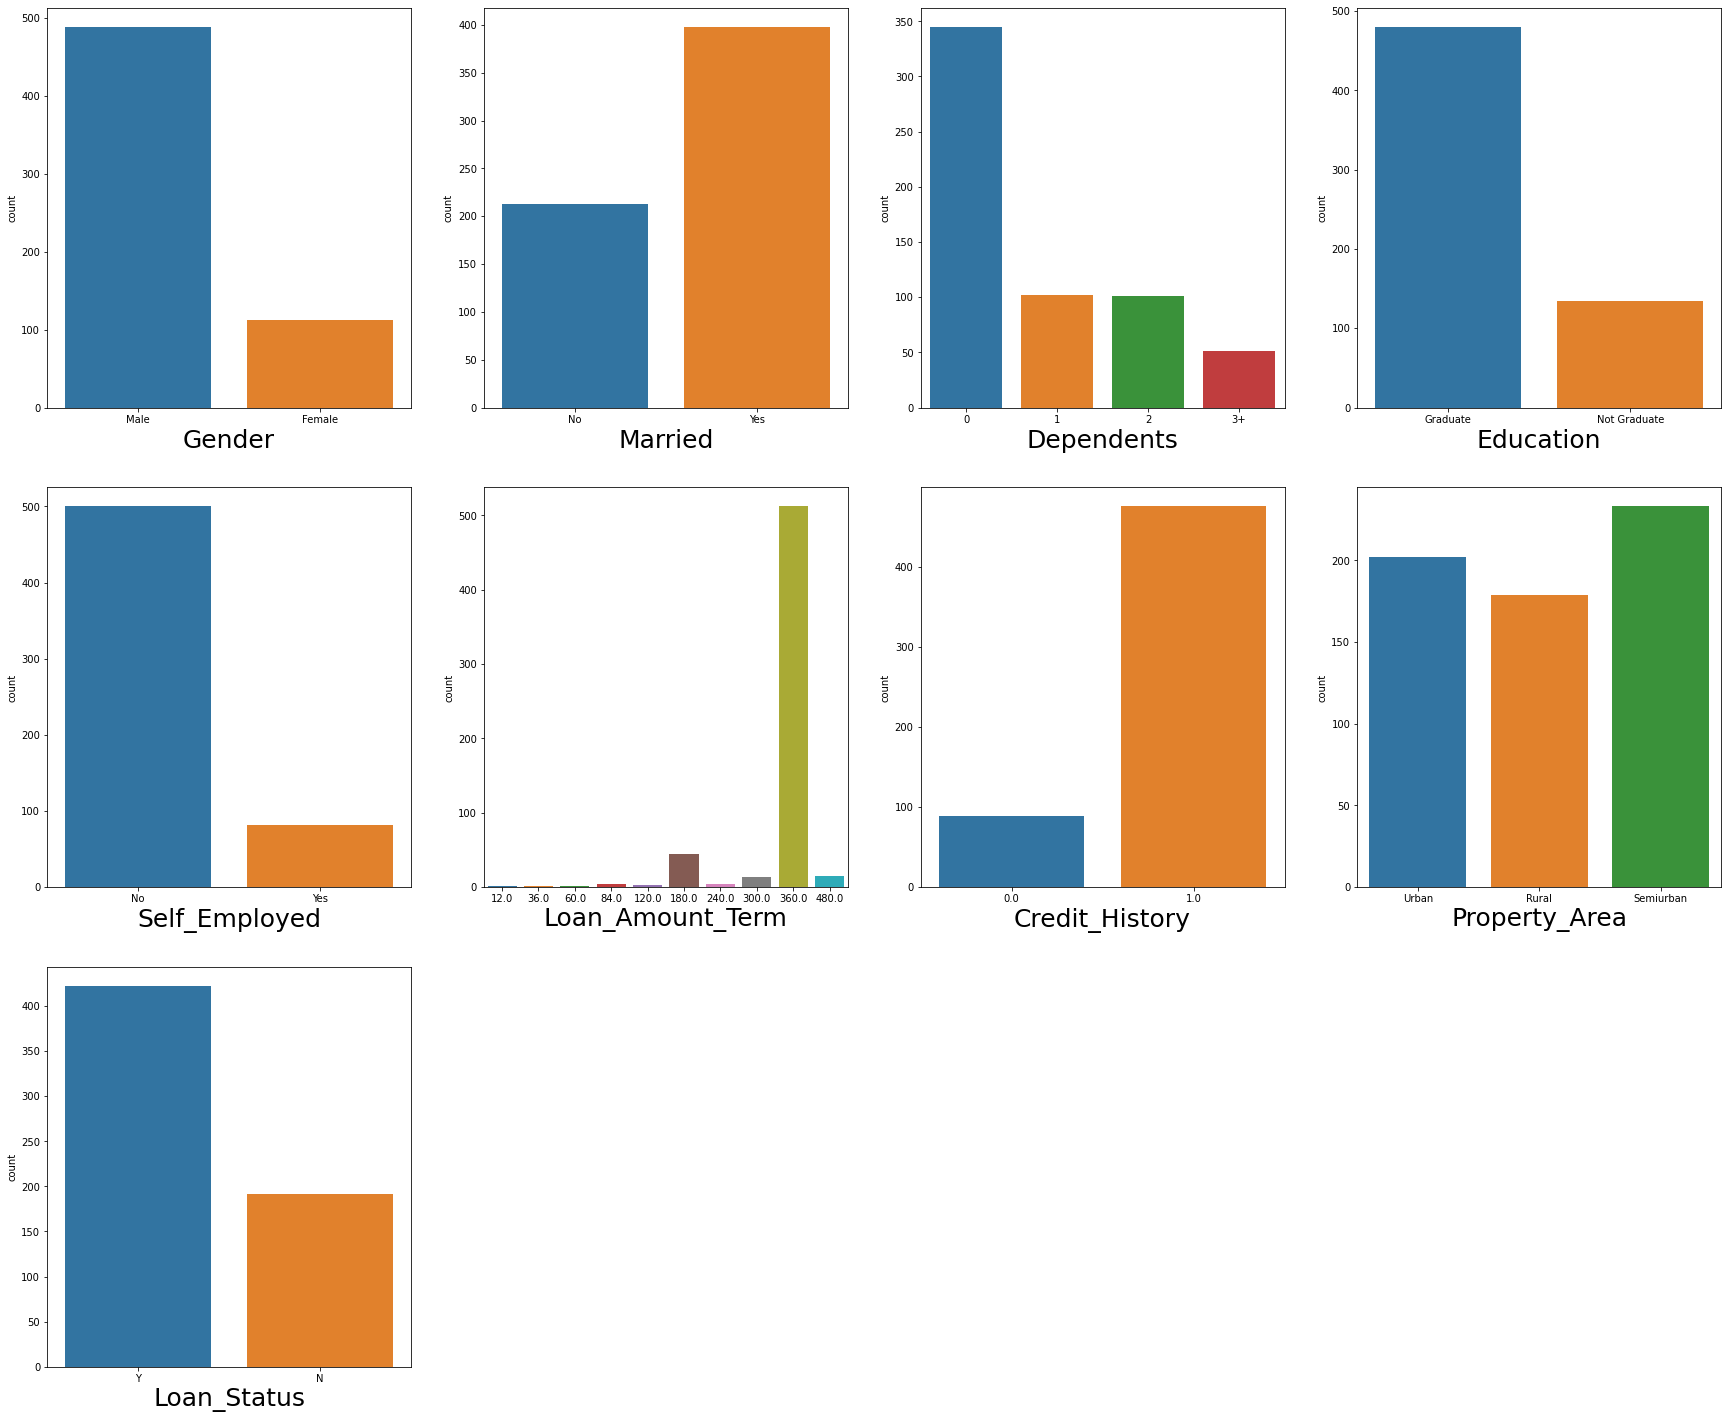

In [13]:
# plot the countplot 
plt.figure(figsize=(30,25))
p=1
for i in cate:
    if p<=12:
        plt.subplot(3,4,p)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=25)
    p+=1
plt.show()

<AxesSubplot:>

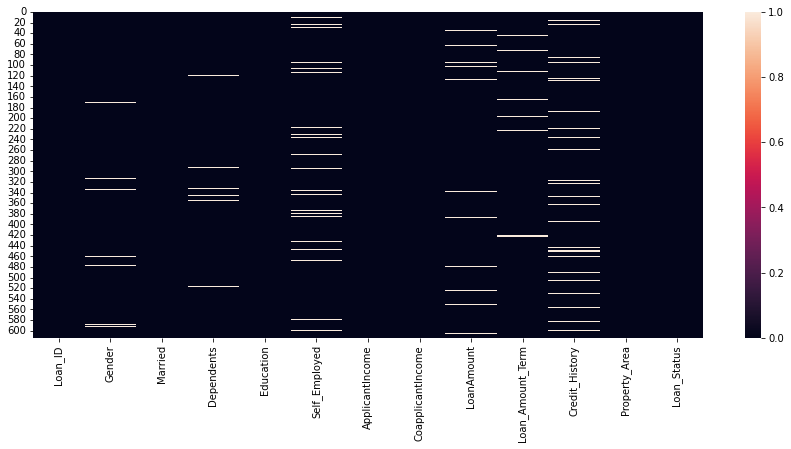

In [14]:
# lets check heat map for the data
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

### fill the missing values with their apporpriate mean ,medain and  mode

##### these are the column which we are going to fill

1) Gender
2) Married
3) Dependents
4) self_employed
5) loanamount
6) load_amount_term
7) credit_history

In [15]:
# filling the categorical columns

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [16]:
# filling the numerical features

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

####  Missing Value Check After Imputation

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

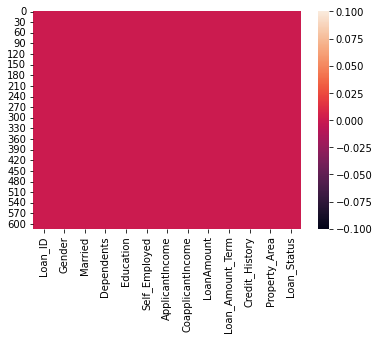

In [18]:
# NOW PLOT THE HEATMAP
sns.heatmap(df.isnull())

<h4>as we can see the data is nicely cleaned now move to next steps 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


as we can see the dependetns columns having object data types so first we can change it to numeric 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
# now its looking owsomee

### now lets plot the pie for every categroical variable and countplot with the target variable

In [22]:
cate=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

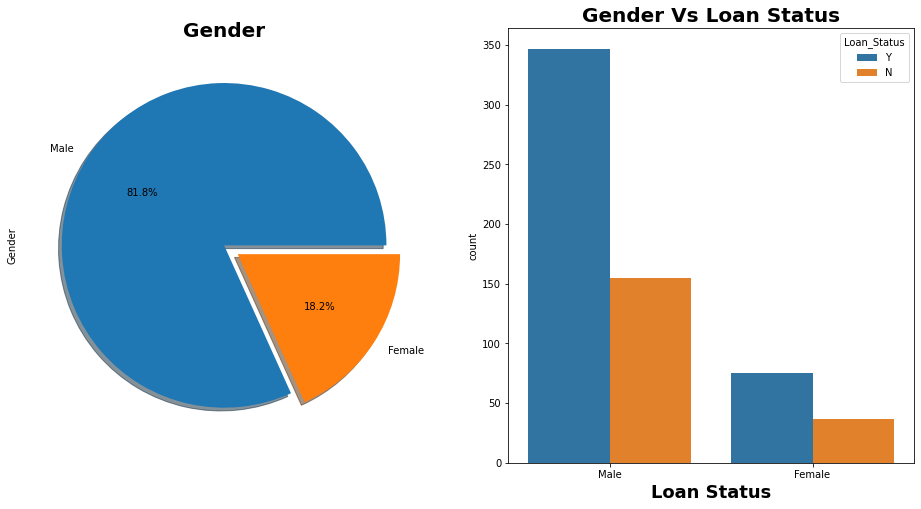

In [23]:
# gender vs loan status 

fig,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("Gender",fontsize=20,fontweight='bold')

sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

as we can see the male having the highest ration of loan status thant the female

In [24]:
# lets groupby both columns and check 

pd.crosstab(df['Gender'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


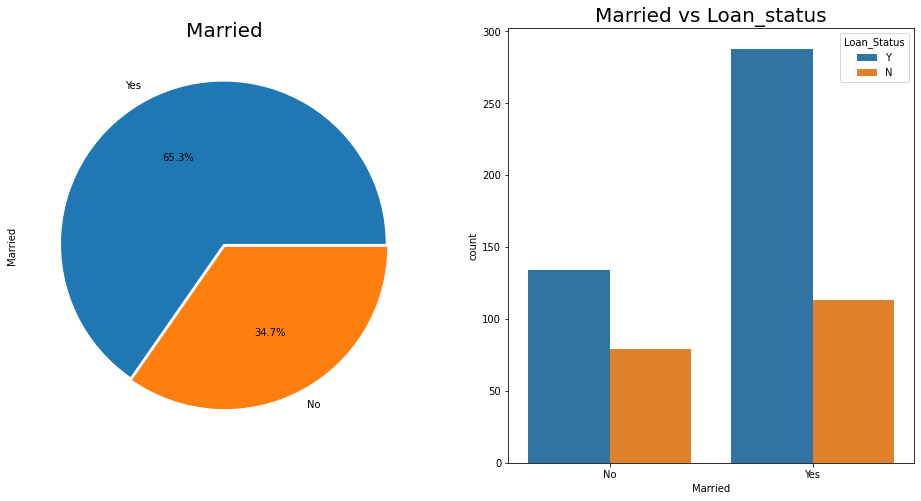

In [25]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.01,0.01],ax=ax[0])
ax[0].set_title("Married",fontsize=20)

sns.countplot('Married',hue='Loan_Status',data=df)
ax[1].set_title("Married vs Loan_status",fontsize=20)

plt.show()

In [26]:
# lets groupby both columns and check 

pd.crosstab(df['Married'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


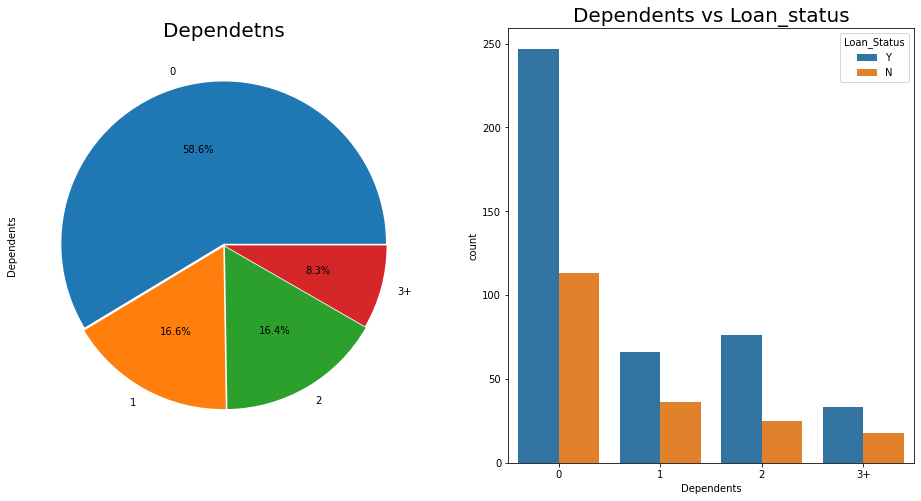

In [27]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.01,0.01,0.01,0.001],ax=ax[0])
ax[0].set_title("Dependetns",fontsize=20)

sns.countplot('Dependents',hue='Loan_Status',data=df)
ax[1].set_title("Dependents vs Loan_status",fontsize=20)

plt.show()

In [28]:
# lets groupby both columns and check 

pd.crosstab([df['Dependents'],df['Gender']],df['Loan_Status'],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

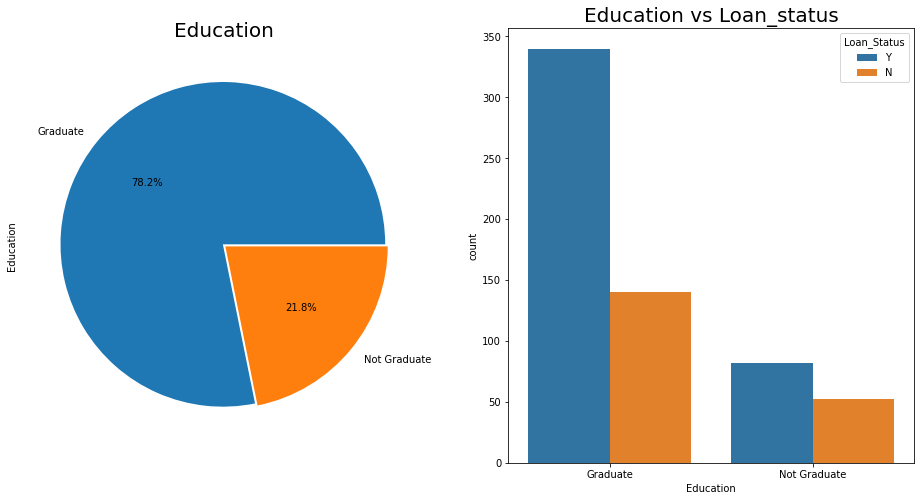

In [29]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.01,0.01],ax=ax[0])
ax[0].set_title("Education",fontsize=20)

sns.countplot('Education',hue='Loan_Status',data=df)
ax[1].set_title("Education vs Loan_status",fontsize=20)

plt.show()

In [30]:
pd.crosstab([df['Education'],df['Gender']],df['Loan_Status'],margins=True)

Loan_Status            N    Y  All
Education    Gender               
Graduate     Female   31   61   92
             Male    109  279  388
Not Graduate Female    6   14   20
             Male     46   68  114
All                  192  422  614

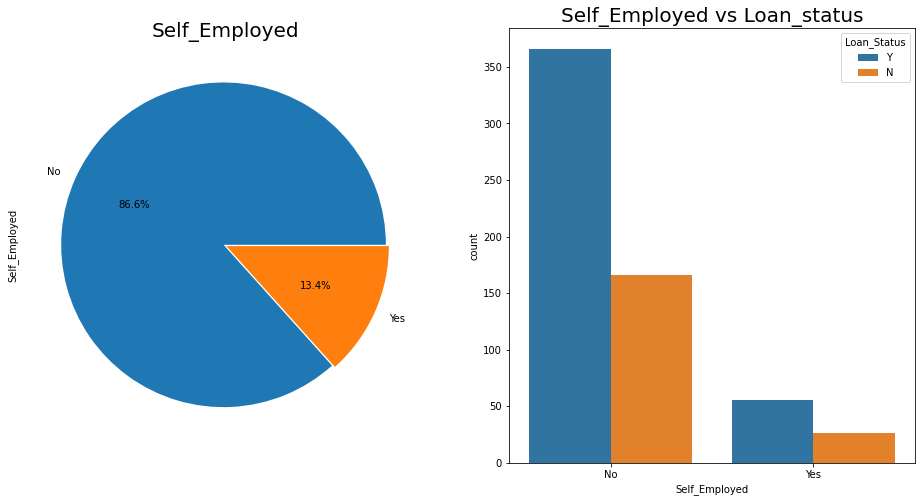

In [31]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['Self_Employed'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.01,0.01],ax=ax[0])
ax[0].set_title("Self_Employed",fontsize=20)

sns.countplot('Self_Employed',hue='Loan_Status',data=df)
ax[1].set_title("Self_Employed vs Loan_status",fontsize=20)

plt.show()

In [32]:
pd.crosstab([df['Self_Employed'],df['Gender']],df['Loan_Status'],margins=True)

Loan_Status             N    Y  All
Self_Employed Gender               
No            Female   31   66   97
              Male    135  300  435
Yes           Female    6    9   15
              Male     20   47   67
All                   192  422  614

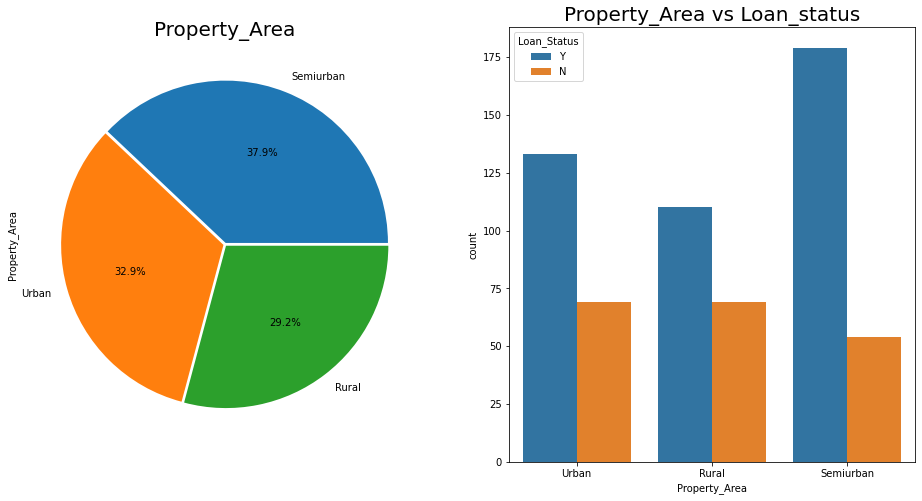

In [33]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['Property_Area'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.01,0.01,0.01],ax=ax[0])
ax[0].set_title("Property_Area",fontsize=20)

sns.countplot('Property_Area',hue='Loan_Status',data=df)
ax[1].set_title("Property_Area vs Loan_status",fontsize=20)

plt.show()

In [34]:
pd.crosstab([df['Property_Area'],df['Gender']],df['Loan_Status'],margins=True)

Loan_Status             N    Y  All
Property_Area Gender               
Rural         Female   10   14   24
              Male     59   96  155
Semiurban     Female   13   42   55
              Male     41  137  178
Urban         Female   14   19   33
              Male     55  114  169
All                   192  422  614

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


#### before going to any further steps we can first now encode the categorical variable into numerical 

In [36]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [37]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [38]:
for i in Category:
    df[i]=le.fit_transform(df[i])
    

In [39]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.046632,-0.076120,0.001963,1.000000,0.032112


<AxesSubplot:>

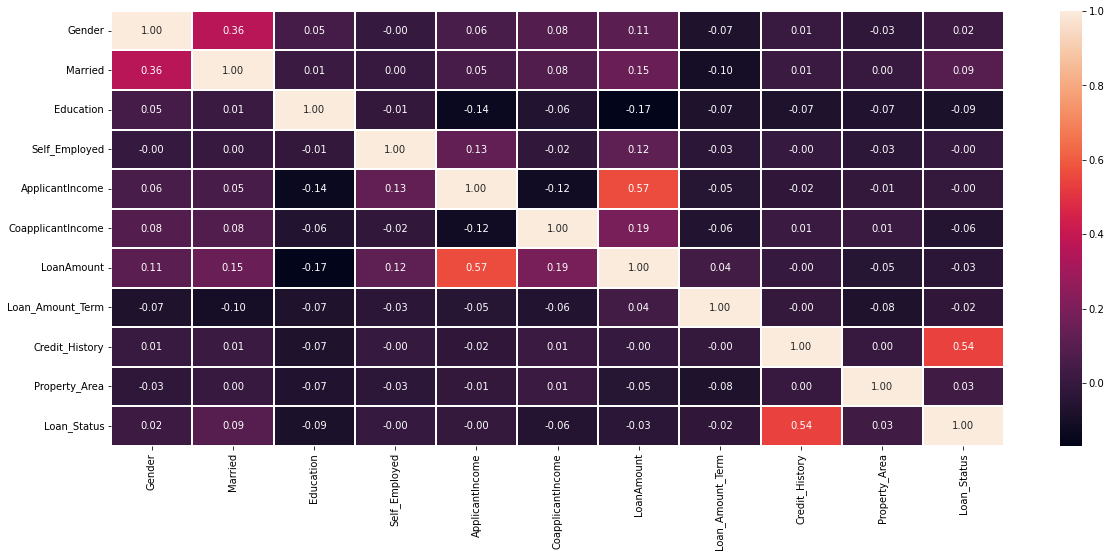

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.01)

<AxesSubplot:>

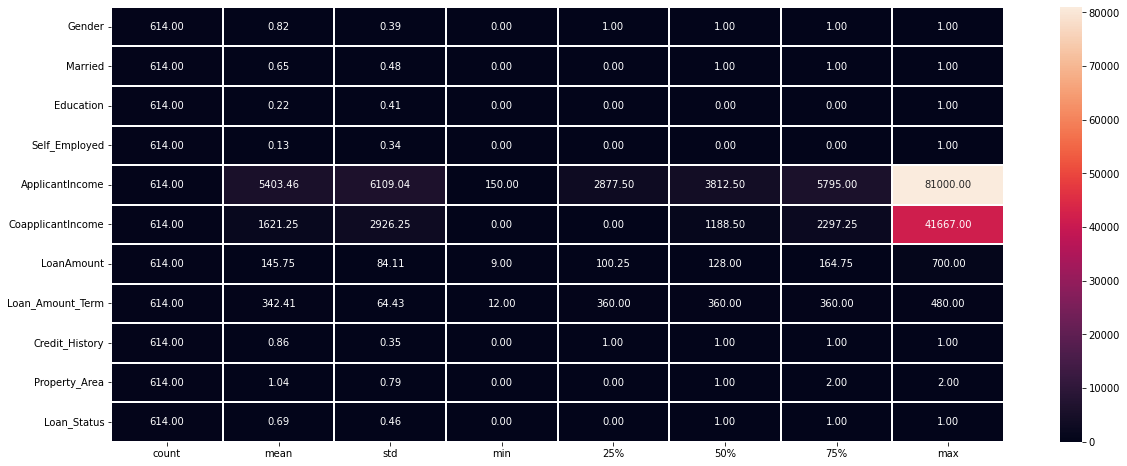

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe().T,annot=True,fmt='0.2f',linewidth=0.01)

#  Feature selection and Engineering

In [42]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

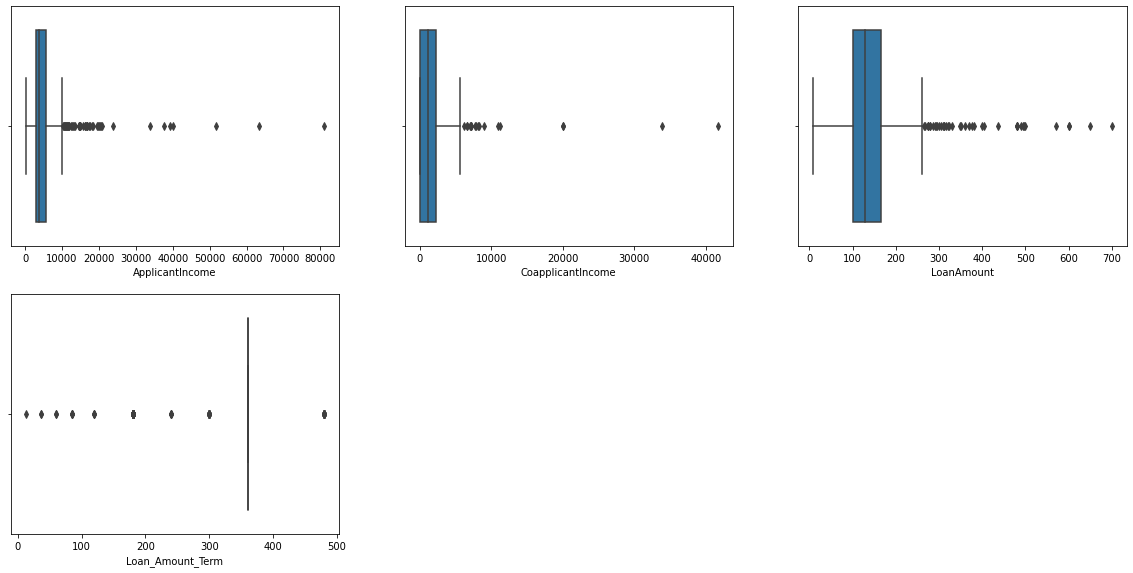

In [43]:
# now we can plot the boxplot to see the outleirs
plt.figure(figsize=(20,15))
p=1
for i in Numerical:
    if p<=9:
        plt.subplot(3,3,p)
        sns.boxplot(df[i])
    p+=1
plt.show()

In [44]:
# before going to any details we can drop the loanID columns its not required much

df.drop(['Loan_ID'],axis=1,inplace=True)

In [45]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [46]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 43.3 KB


In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [49]:
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.490816,0.273231,0.411733,1.223298,0.674519


In [50]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [51]:
df=df1.copy() 

### check for the skewness

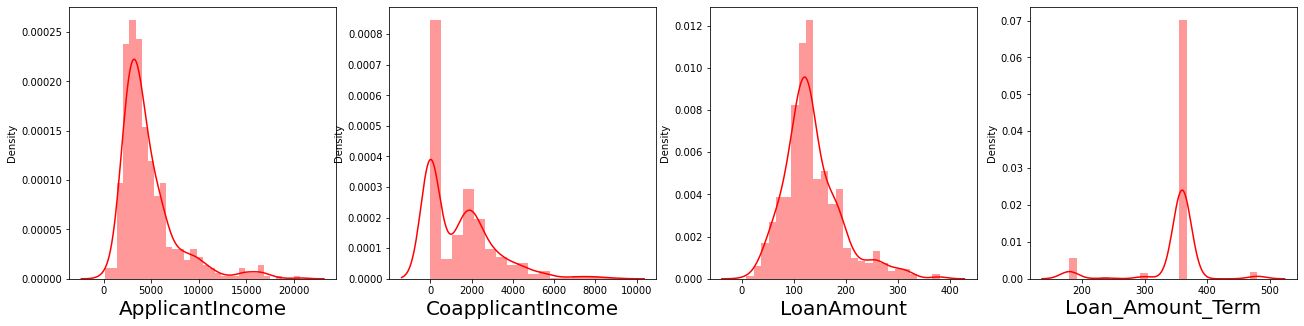

In [52]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [53]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Comment :<br>
Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' , 'Loan_Amount_Term 'are skewed which are numerical feature.<br>
Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.

In [54]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [55]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.000771,0.130788
1,0.234783,0.744117,0.000771,0.130788
2,-0.527201,-1.122446,-1.437336,0.130788
3,-0.791972,0.895786,-0.153545,0.130788
4,0.728848,-1.122446,0.238260,0.130788


In [56]:
#again checkin the skewness after applying yeo-johnson method

In [57]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

as we can see for the numerical features the skewness is reduce very good

###  check for the corelation

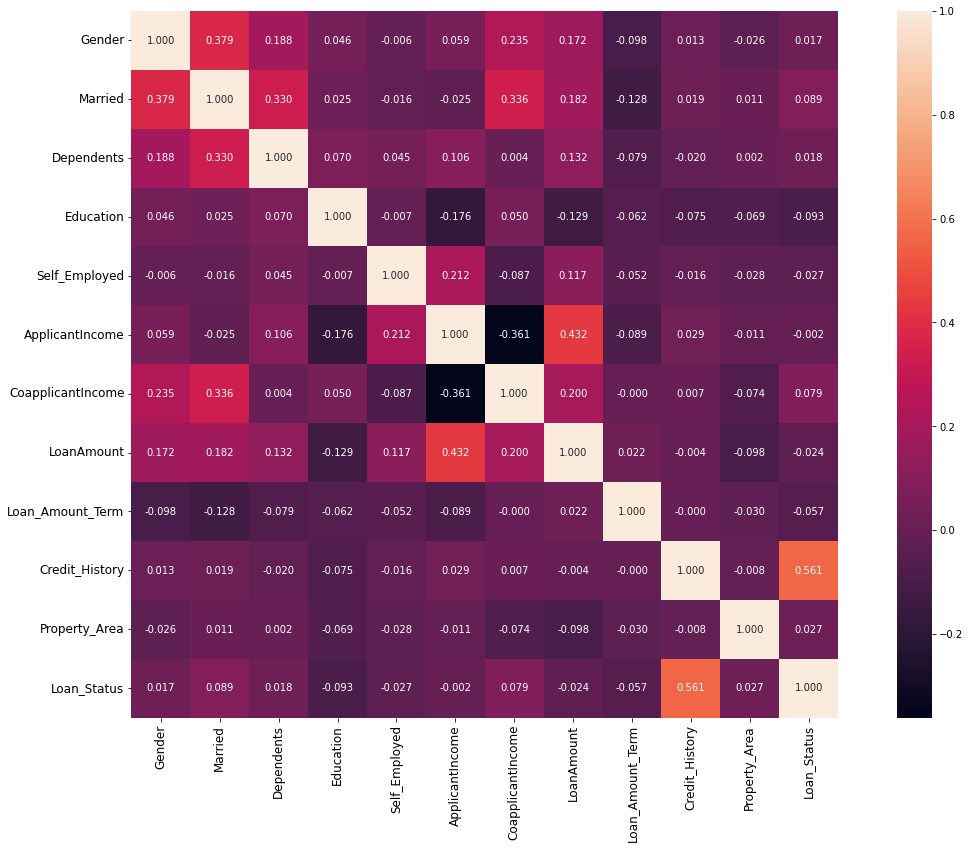

In [58]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(),annot=True, square=True, fmt='0.3f',annot_kws={'size':10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

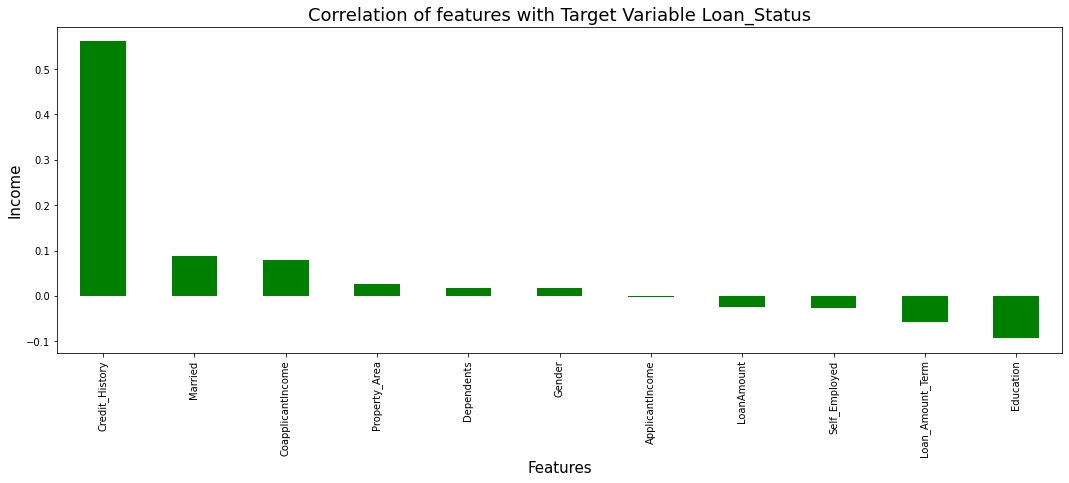

In [59]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

## Checking Multicollinearity between features using variance_inflation_factor

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,5.121474,Gender
1,3.945369,Married
2,1.778691,Dependents
3,1.342535,Education
4,1.184784,Self_Employed
5,1.753023,ApplicantIncome
6,1.558336,CoapplicantIncome
7,1.556930,LoanAmount
8,1.040352,Loan_Amount_Term
9,7.381319,Credit_History


###  now check for the target data is balanced or not 

In [61]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

##### so the data is not balanced we can balanced it with using SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [64]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [65]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

### Standard Scaling


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc=StandardScaler()

In [76]:
X_scale =pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [77]:
X_scale

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.495678,-1.245505,-0.70706,-0.491741,-0.341188,0.698405,-1.062005,0.009197,0.110766,0.578965,1.305619
1,0.495678,0.802887,0.30703,-0.491741,-0.341188,0.235346,0.792407,0.009197,0.110766,0.578965,-1.232288
2,0.495678,0.802887,-0.70706,-0.491741,2.930932,-0.554019,-1.062005,-1.462150,0.110766,0.578965,1.305619
3,0.495678,0.802887,-0.70706,2.033589,-0.341188,-0.828305,0.943089,-0.148686,0.110766,0.578965,1.305619
4,0.495678,-1.245505,-0.70706,-0.491741,-0.341188,0.747164,-1.062005,0.252175,0.110766,0.578965,1.305619
...,...,...,...,...,...,...,...,...,...,...,...
791,-2.017440,0.802887,0.30703,-0.491741,-0.341188,-2.337565,0.977653,-0.024238,0.110766,0.578965,1.305619
792,0.495678,0.802887,-0.70706,-0.491741,-0.341188,-1.084248,1.225277,-0.755371,-2.480295,0.578965,0.036666
793,0.495678,0.802887,1.32112,2.033589,-0.341188,-0.076005,-1.062005,-0.180684,-2.480295,0.366619,1.305619
794,0.495678,-1.245505,-0.70706,-0.491741,-0.341188,-1.357448,1.208378,-1.423745,0.110766,0.578965,-1.232288


### importing ml libraries for classification

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Finding Best Random State

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8375 on Random_state 68


### Logistic Regression

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8075313807531381


Confusion matrix of Logistics Regression : 
 [[ 72  38]
 [  8 121]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.65      0.76       110
           1       0.76      0.94      0.84       129

    accuracy                           0.81       239
   macro avg       0.83      0.80      0.80       239
weighted avg       0.82      0.81      0.80       239



## Finding Optimal value of n_neighbors for KNN

In [85]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47091116165974684
RMSE value for k=  2 is: 0.5255003592910882
RMSE value for k=  3 is: 0.4968520148758506
RMSE value for k=  4 is: 0.5334030637818674
RMSE value for k=  5 is: 0.5255003592910882
RMSE value for k=  6 is: 0.5294664560040351
RMSE value for k=  7 is: 0.513418276223035
RMSE value for k=  8 is: 0.5294664560040351
RMSE value for k=  9 is: 0.513418276223035
RMSE value for k=  10 is: 0.5215041008435626
RMSE value for k=  11 is: 0.5052030537546389
RMSE value for k=  12 is: 0.513418276223035
RMSE value for k=  13 is: 0.5052030537546389
RMSE value for k=  14 is: 0.50104493321917
RMSE value for k=  15 is: 0.5093272287453544
RMSE value for k=  16 is: 0.513418276223035
RMSE value for k=  17 is: 0.47971400126799746
RMSE value for k=  18 is: 0.4883581921595791
RMSE value for k=  19 is: 0.47091116165974684
RMSE value for k=  20 is: 0.4883581921595791
RMSE value for k=  21 is: 0.4753329597178616
RMSE value for k=  22 is: 0.4883581921595791
RMSE value for k=  23 

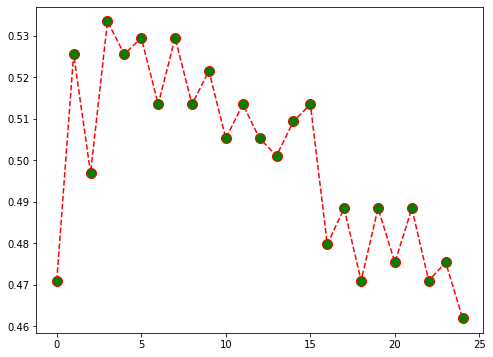

In [87]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

Comment-
At k=3, we get the minimum RMSE value which approximately 0.44814821218396267

### make a for loop to apply the same things on all ml model

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7698744769874477


Confusion matrix : 
 [[ 67  43]
 [ 12 117]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.61      0.71       110
           1       0.73      0.91      0.81       129

    accuracy                           0.77       239
   macro avg       0.79      0.76      0.76       239
weighted avg       0.79      0.77      0.76       239





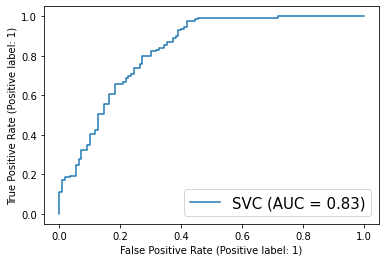

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.803347280334728


Confusion matrix : 
 [[95 15]
 [32 97]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       110
           1       0.87      0.75      0.80       129

    accuracy                           0.80       239
   macro avg       0.81      0.81      0.80       239
weighted avg       0.81      0.80      0.80       239





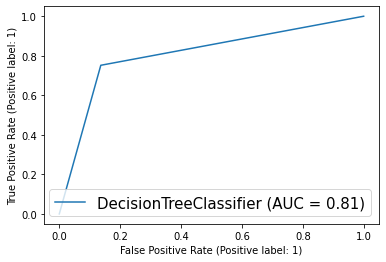

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7531380753138075


Confusion matrix : 
 [[ 79  31]
 [ 28 101]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       110
           1       0.77      0.78      0.77       129

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239





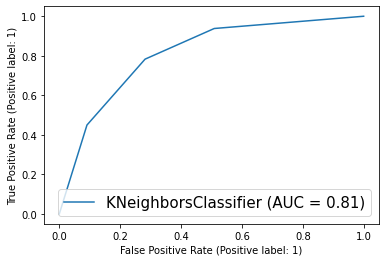

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8577405857740585


Confusion matrix : 
 [[ 91  19]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.86      0.88      0.87       129

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239





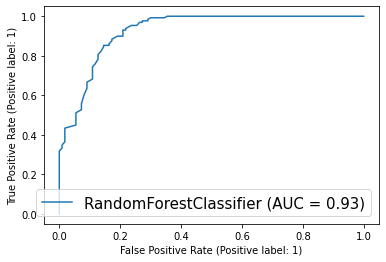

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8661087866108786


Confusion matrix : 
 [[ 91  19]
 [ 13 116]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.86      0.90      0.88       129

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.87       239





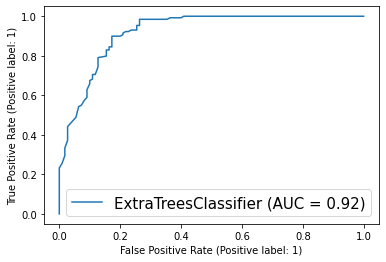

In [90]:
from sklearn.metrics import plot_roc_curve
model=[SVC(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':15}, loc='lower right')
    plt.show()
    print('============================================================================================================')


## Cross-Validation

In [91]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.7        0.71069182 0.74842767 0.76100629 0.76100629]
Mean Score : 0.7362264150943396
Std deviation : 0.025850816325968525




Cross Validation Score SVC() :

Score : [0.6875     0.74213836 0.79245283 0.76100629 0.77358491]
Mean Score : 0.7513364779874213
Std deviation : 0.03588524323911718




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69375    0.69811321 0.80503145 0.77358491 0.75471698]
Mean Score : 0.7450393081761006
Std deviation : 0.04322086812773577




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.71875    0.70440252 0.72955975 0.74213836 0.77358491]
Mean Score : 0.7336871069182389
Std deviation : 0.02349892608850462




Cross Validation Score RandomForestClassifier() :

Score : [0.78125    0.83647799 0.86792453 0.86792453 0.8490566 ]
Mean Score : 0.8405267295597485
Std deviation : 0.03195046317703653




Cross Validation Score ExtraTreesClassifier() :

Score : [0.75625    

We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

### HyperParameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}



In [93]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.786 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.688 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.640 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.759 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.759 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.759 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.784 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.739 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.714 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.768 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.802 total time=

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.759 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.768 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.838 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.775 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.757 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.777 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.847 tot

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.856 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.757 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.820 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.777 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.750 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.820 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.784 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.811 tot

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.741 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.838 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.739 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.739 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.804 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.777 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.802 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.793 tot

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.768 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.723 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.829 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.757 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.775 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=60;, score=0.750 tot

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.741 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.802 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.766 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.721 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.759 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.750 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.802 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.793 tot

[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.750 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.768 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.730 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.739 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.768 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;,

[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.759 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.820 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.786 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=25;, score=0.759 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.784 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.793 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.786 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.759 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.793 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=25;, score=0.739 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.757 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.750 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.732 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.775 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.748 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimat

[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.748 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.812 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.741 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.757 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.775 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.768 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimat

[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.795 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.777 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.820 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.757 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.766 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.804 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.759 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [94]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50}

### Final Model

In [95]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 50, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8661087866108786


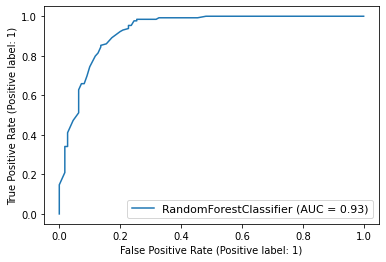

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8612403100775193


In [96]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving Model

In [97]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']